# Ocean macronutrients

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import xarray as xr
import glob
from dask.distributed import Client
import numpy as np

import catalog
import util

xr.set_options(keep_attrs=True)

In [3]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import pop_tools

In [4]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons = ds_grid.TLONG
lats = ds_grid.TLAT
depths = ds_grid.z_t * 0.01

### Connect to cluster

In [5]:
cluster, client = util.get_ClusterClient()
cluster.scale(12)

/glade/work/eromashkova/miniconda3/envs/ocean-bgc-cookbook-dev/lib/python3.11/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/eromashkova/miniconda3/envs/ocean-bgc-cookbook-dev/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39283 instead
  warnings.warn(
/glade/work/eromashkova/miniconda3/envs/ocean-bgc-cookbook-dev/lib/python3.11/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check confi

## Load the data

In [6]:
case = 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.002branch'
path = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-OMIP2-like-4p2z-run/'+case+'/ocn/proc/tseries/month_1'
coords = {'x':'TLONG','y':'TLAT'}
path

'/glade/campaign/cesm/development/bgcwg/projects/CESM2-OMIP2-like-4p2z-run/g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.002branch/ocn/proc/tseries/month_1'

In [17]:
files = glob.glob(f'{path}/{case}.pop.h.*.195801-202112.nc')
ds=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True,
                       drop_variables=["transport_components", "transport_regions", 'moc_components'], decode_times=True)
ds

<xarray.Dataset>
Dimensions:                           (time: 768, nlat: 384, nlon: 320,
                                       z_t: 60, z_w: 60, lat_aux_grid: 395,
                                       moc_z: 61, d2: 2, z_t_150m: 15,
                                       z_w_bot: 60, z_w_top: 60,
                                       transport_reg: 2, moc_comp: 3,
                                       transport_comp: 5)
Coordinates:
    TLAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid                      (lat_aux_grid) float32 -79.49 ... 90.0
  * moc_z                             (moc_z) float32 0.0 1e+03 ... 5.5e+05
  * time                              (time) object 1958-02-01 00:00:00 ... 2...
  * z_t                               (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                          (z_t_150m) float32 500.0 ... 1.45e+04
  * z_w                               (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                           (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
  * z_w_top                           (z_w_top) float32 0.0 1e+03 ... 5.25e+05
Dimensions without coordinates: nlat, nlon, d2, transport_reg, moc_comp,
                                transport_comp
Data variables: (12/544)
    ADVS                              (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    ANGLE                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ANGLET                            (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXT                               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXU                               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYT                               (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                                ...
    x_graze_mesozoo_zint              (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    x_graze_mesozoo_zint_100m         (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    x_graze_microzoo_zint             (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    x_graze_microzoo_zint_100m        (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    zsatarag                          (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
    zsatcalc                          (time, nlat, nlon) float32 dask.array<chunksize=(81, 124, 104), meta=np.ndarray>
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.002branch
    history:           Wed Jun 21 09:15:38 2023: ncks -O -4 -L 1 /glade/scrat...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2023-06-13 at 16:35:05.0
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    NCO:               netCDF Operators version 5.1.4 (Homepage = http://nco....

### Variable list
Make our dataset smaller so it just has the variables we're interested in

In [8]:
variables =['PO4','NO3','SiO3']

In [9]:
keep_vars=['z_t','z_t_150m','dz','time_bound','time','TAREA','TLAT','TLONG'] + variables
ds = ds.drop([v for v in ds.variables if v not in keep_vars])

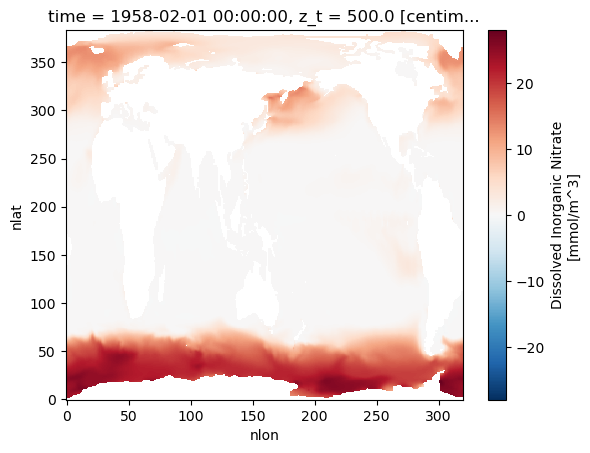

In [10]:
ds.NO3.isel(time=0,z_t=0).plot()

In [35]:
def year_mean(ds):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = (
        month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    )

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby("time.year").sum().values, np.ones((len(ds.groupby("time.year")), )))

    # Calculate the weighted average
    return (ds * weights).groupby("time.year").sum(dim="time")

In [36]:
ds_test = year_mean(ds)
ds_test

<xarray.Dataset>
Dimensions:                           (nlat: 384, nlon: 320, lat_aux_grid: 395,
                                       moc_z: 61, z_t: 60, z_t_150m: 15,
                                       z_w: 60, z_w_bot: 60, z_w_top: 60,
                                       year: 65, transport_reg: 2, moc_comp: 3,
                                       transport_comp: 5)
Coordinates:
    TLAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                              (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid                      (lat_aux_grid) float32 -79.49 ... 90.0
  * moc_z                             (moc_z) float32 0.0 1e+03 ... 5.5e+05
  * z_t                               (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                          (z_t_150m) float32 500.0 ... 1.45e+04
  * z_w                               (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                           (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
  * z_w_top                           (z_w_top) float32 0.0 1e+03 ... 5.25e+05
  * year                              (year) int64 1958 1959 1960 ... 2021 2022
Dimensions without coordinates: nlat, nlon, transport_reg, moc_comp,
                                transport_comp
Data variables: (12/543)
    ADVS                              (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    ANGLE                             (year, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ANGLET                            (year, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    DXT                               (year, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    DXU                               (year, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    DYT                               (year, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                                ...
    x_graze_mesozoo_zint              (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    x_graze_mesozoo_zint_100m         (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    x_graze_microzoo_zint             (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    x_graze_microzoo_zint_100m        (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    zsatarag                          (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
    zsatcalc                          (year, nlat, nlon) float64 dask.array<chunksize=(1, 124, 104), meta=np.ndarray>
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.002branch
    history:           Wed Jun 21 09:15:38 2023: ncks -O -4 -L 1 /glade/scrat...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2023-06-13 at 16:35:05.0
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    NCO:               netCDF Operators version 5.1.4 (Homepage = http://nco....

In [38]:
ds = ds_test.mean('year')

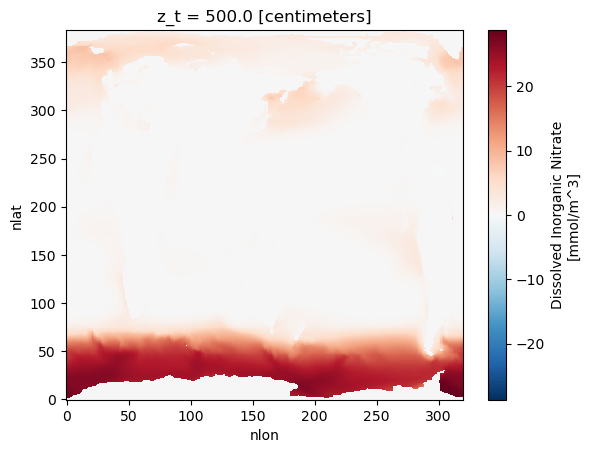

In [39]:
ds['NO3'].isel(z_t=0).plot()

## Let's make a nicer-looking map

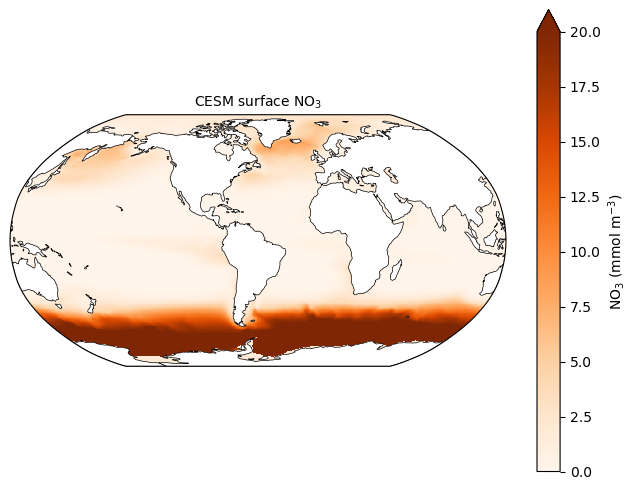

In [14]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM surface NO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.NO3.isel(z_t=0))
pc1=ax.pcolormesh(lon, lat,field, vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

## Compare long-term mean to World Ocean Atlas 2018

- About the [World Ocean Atlas](https://www.ncei.noaa.gov/products/world-ocean-atlas)
- [Data access to WOA18](https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/)

We've already regridded this data to be on the same grid as the CESM POP data, so we don't need to worry about that step. However, if you wanted to compare to a model that's on a different grid, you'd need to go through the regridding process, which is beyond the scope of this cookbook.

In [15]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2018_POPgrid.nc' 
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)
ds_woa['z_t'] = ds.z_t

KeyboardInterrupt: 

In [ ]:
NO3_diff = ds.NO3 - ds_woa.NO3
PO4_diff = ds.PO4 - ds_woa.PO4
SiO3_diff = ds.SiO3 - ds_woa.SiO3

### Surface comparison

In [ ]:
fig = plt.figure(figsize=(18,10))

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM surface NO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.NO3.isel(z_t=0))
pc1=ax.pcolormesh(lon, lat,field, vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA surface NO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.NO3.isel(z_t=0))
pc2=ax.pcolormesh(lon, lat, field, vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,7, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('Surface NO$_3$ model bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  NO3_diff.isel(z_t=0))
pc3=ax.pcolormesh(lon, lat, field, vmin=-10, vmax=10, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')



####################PO4
#---- CESM panel
ax = fig.add_subplot(3,3,2, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM surface PO$_4$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.PO4.isel(z_t=0))
pc1=ax.pcolormesh(lon, lat,field, vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,5, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA surface PO$_4$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.PO4.isel(z_t=0))
pc2=ax.pcolormesh(lon, lat,field, vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,8, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('Surface PO$_4$ bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  PO4_diff.isel(z_t=0))
pc3=ax.pcolormesh(lon, lat,field, vmin=-1, vmax=1, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='PO$_4$ bias (mmol m$^{-3}$)')



####################SiO3
#---- CESM panel
ax = fig.add_subplot(3,3,3, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM surface SiO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.SiO3.isel(z_t=0))
pc1=ax.pcolormesh(lon, lat, field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,6, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA surface SiO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.SiO3.isel(z_t=0))
pc2=ax.pcolormesh(lon, lat,field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,9, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('Surface SiO$_3$ bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  SiO3_diff.isel(z_t=0))
pc3=ax.pcolormesh(lon, lat, field, 
                  vmin=-15, vmax=15, 
                  cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='SiO$_3$ bias (mmol m$^{-3}$)');

### Comparison at 100m

In [ ]:
fig = plt.figure(figsize=(18,10))

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM 100m NO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.NO3.isel(z_t=10))
pc1=ax.pcolormesh(lon, lat,field, vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA 100m NO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.NO3.isel(z_t=10))
pc2=ax.pcolormesh(lon, lat, field, vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,7, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('100m NO$_3$ model bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  NO3_diff.isel(z_t=10))
pc3=ax.pcolormesh(lon, lat, field, vmin=-10, vmax=10, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')



####################PO4
#---- CESM panel
ax = fig.add_subplot(3,3,2, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM 100m PO$_4$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.PO4.isel(z_t=10))
pc1=ax.pcolormesh(lon, lat,field, vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,5, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA 100m PO$_4$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.PO4.isel(z_t=10))
pc2=ax.pcolormesh(lon, lat,field, vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,8, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('100m PO$_4$ bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  PO4_diff.isel(z_t=10))
pc3=ax.pcolormesh(lon, lat,field, vmin=-1, vmax=1, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='PO$_4$ bias (mmol m$^{-3}$)')



####################SiO3
#---- CESM panel
ax = fig.add_subplot(3,3,3, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('CESM 100m SiO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats, ds.SiO3.isel(z_t=10))
pc1=ax.pcolormesh(lon, lat, field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,6, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('WOA 100m SiO$_3$', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  ds_woa.SiO3.isel(z_t=10))
pc2=ax.pcolormesh(lon, lat,field, 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,9, projection=ccrs.Robinson(central_longitude=305.0))
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='110m', edgecolor='k', facecolor='white', linewidth=0.5)
ax.add_feature(land)
ax.set_title('100m SiO$_3$ bias', fontsize=10)
lon, lat, field = util.adjust_pop_grid(lons, lats,  SiO3_diff.isel(z_t=10))
pc3=ax.pcolormesh(lon, lat, field, 
                  vmin=-15, vmax=15, 
                  cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='SiO$_3$ bias (mmol m$^{-3}$)');

## Global mean macronutrient profiles

In [ ]:
ds_glb = util.global_mean(ds, ds_grid, ['NO3','PO4','SiO3']).compute()

In [ ]:
ds_glb_woa = util.global_mean(ds_woa, ds_grid, ['NO3','PO4','SiO3']).compute()

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.suptitle('Global mean macronutrient profiles', fontsize=14)


#COLUMN 1  - NO3

ax = fig.add_subplot(2,3,1)
ax.set_title('Global mean NO$_3$')
ax.plot(ds_glb['NO3'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['NO3'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='NO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 2  - PO4

ax = fig.add_subplot(2,3,2)
ax.set_title('Global mean PO$_4$')
ax.plot(ds_glb['PO4'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['PO4'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='PO$_4$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 3  - SiO3

ax = fig.add_subplot(2,3,3)
ax.set_title('Global mean SiO$_3$')
ax.plot(ds_glb['SiO3'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['SiO3'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='SiO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()


#COLUMN 1  - NO3 diff

ax = fig.add_subplot(2,3,4)
ax.plot(ds_glb['NO3'].values - ds_glb_woa['NO3'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='NO$_3$ bias (mmol m$^{-3}$)')
ax.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
plt.gca().invert_yaxis()

#COLUMN 2  - PO4 diff

ax = fig.add_subplot(2,3,5)
ax.plot(ds_glb['PO4'].values - ds_glb_woa['PO4'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='PO$_4$ bias (mmol m$^{-3}$)')
ax.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
plt.gca().invert_yaxis()

#COLUMN 3  - SiO3 diff

ax = fig.add_subplot(2,3,6)
ax.plot(ds_glb['SiO3'].values - ds_glb_woa['SiO3'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='SiO$_3$ bias (mmol m$^{-3}$)')
ax.axvline(x=0,color='black',linestyle='--',linewidth=0.5)
plt.gca().invert_yaxis()

